In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
# Load the data

df_disasterlocations = pd.read_csv('../datasets/pend-gdis-1960-2018-disasterlocations.csv')

In [6]:
df_disasterlocations.head()

id  country iso3   gwno  year  geo_id  geolocation  level     adm1  \
0  109  Albania  ALB  339.0  2009     346  Ana E Malit      3  Shkoder   
1  109  Albania  ALB  339.0  2009     351       Bushat      3  Shkoder   
2  175   Angola  AGO  540.0  2001     760       Onjiva      3   Cunene   
3  187   Angola  AGO  540.0  2009     710        Evale      3   Cunene   
4  187   Angola  AGO  540.0  2009     749         Mupa      3   Cunene   

       adm2         adm3     location  historical hist_country disastertype  \
0  Shkodres  Ana E Malit  Ana E Malit           0          NaN        flood   
1  Shkodres       Bushat       Bushat           0          NaN        flood   
2  Cuanhama       Onjiva       Onjiva           0          NaN        flood   
3  Cuanhama        Evale        Evale           0          NaN        flood   
4   Cuvelai         Mupa         Mupa           0          NaN        flood   

  disasterno   latitude  longitude  
0  2009-0631  42.020948  19.418317  
1  2009-0631  41.959294  19.514309  
2  2001-0146 -17.093484  15.665758  
3  2009-0092 -16.531533  15.773987  
4  2009-0092 -16.200065  15.844189

In [7]:
df_disasterlocations.columns

Index(['id', 'country', 'iso3', 'gwno', 'year', 'geo_id', 'geolocation',
       'level', 'adm1', 'adm2', 'adm3', 'location', 'historical',
       'hist_country', 'disastertype', 'disasterno', 'latitude', 'longitude'],
      dtype='object')

In [26]:
df_disasterlocations_filtered = df_disasterlocations[['country', 'year', 'geolocation', 'disastertype', 'latitude', 'longitude']]
df_disasterlocations_filtered.head()

country  year  geolocation disastertype   latitude  longitude
0  Albania  2009  Ana E Malit        flood  42.020948  19.418317
1  Albania  2009       Bushat        flood  41.959294  19.514309
2   Angola  2001       Onjiva        flood -17.093484  15.665758
3   Angola  2009        Evale        flood -16.531533  15.773987
4   Angola  2009         Mupa        flood -16.200065  15.844189

In [30]:
# Function with all filters

def filter_disasters(df, country, year, disaster_type, geolocation):
    # Check if the country, year, disaster type and geolocation are not None
    if country is not None:
        df = df[df['country'] == country]
    if year is not None:
        df = df[df['year'] == year]
    if disaster_type is not None:
        df = df[df['disastertype'] == disaster_type]
    if geolocation is not None:
        df = df[df['geolocation'] == geolocation]
    return df

# Using kwargs to pass the filters

def filter_disasters_kwargs(df, **kwargs):
    # Check if the country, year, disaster type and geolocation are not None
    for key, value in kwargs.items():
        if value is not None:
            df = df[df[key] == value]
    return df

In [24]:
filter_disasters(df_disasterlocations_filtered, country = 'Colombia', year = 1992, disastertype = 'earthquake', geolocation = 'Medellin')

TypeError: filter_disasters() got an unexpected keyword argument 'disastertype'

In [34]:
country, year, disastertype, geolocation = 'Colombia', 1992, 'earthquake', 'Medellin'

filter_disasters_kwargs(df_disasterlocations_filtered, country = country, year = year, disastertype = disastertype, geolocation = geolocation)

country  year geolocation disastertype  latitude  longitude
2430  Colombia  1992    Medellin   earthquake  6.265727 -75.633836

In [29]:
df_disasterlocations_filtered

country  year    geolocation disastertype   latitude  longitude
0       Albania  2009    Ana E Malit        flood  42.020948  19.418317
1       Albania  2009         Bushat        flood  41.959294  19.514309
2        Angola  2001         Onjiva        flood -17.093484  15.665758
3        Angola  2009          Evale        flood -16.531533  15.773987
4        Angola  2009           Mupa        flood -16.200065  15.844189
...         ...   ...            ...          ...        ...        ...
39948  Dominica  2015  Saint Patrick        storm  15.282063 -61.291589
39949  Dominica  2015   Saint Andrew        storm  15.541065 -61.350601
39950  Dominica  2015   Saint George        storm  15.308003 -61.343527
39951  Dominica  2015    Saint David        storm  15.413059 -61.282094
39952  Dominica  2015     Saint Paul        storm  15.367511 -61.364736

[39953 rows x 6 columns]

In [ ]:
# Functions to give the data

def get_disaster_locations_by_year(year):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['year'] == year].to_json(orient='records')

def get_disaster_locations_by_country(country):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['country'] == country].to_json(orient='records')

def get_disaster_locations_by_disaster_type(disaster_type):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['disastertype'] == disaster_type].to_json(orient='records')

def get_disaster_locations_by_geolocation(geolocation):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['geolocation'] == geolocation].to_json(orient='records')

def get_disaster_locations_by_country_and_year(country, year):
    return df_disasterlocations_filtered[(df_disasterlocations_filtered['country'] == country) & (df_disasterlocations_filtered['year'] == year)].to_json(orient='records')

In [14]:
# Functions to plot the data

def plot_disaster_locations(df, year):
    df_year = df[df['year'] == year]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='longitude', y='latitude', hue='disastertype', data=df_year)
    plt.title(f'Disaster locations in {year}')
    plt.show()

def plot_disaster_locations_by_country(df, year, country):
    df_year_country = df[(df['year'] == year) & (df['country'] == country)]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='longitude', y='latitude', hue='disastertype', data=df_year_country)
    plt.title(f'Disaster locations in {year} in {country}')
    plt.show()

In [ ]:
get_disaster_locations_by_year()

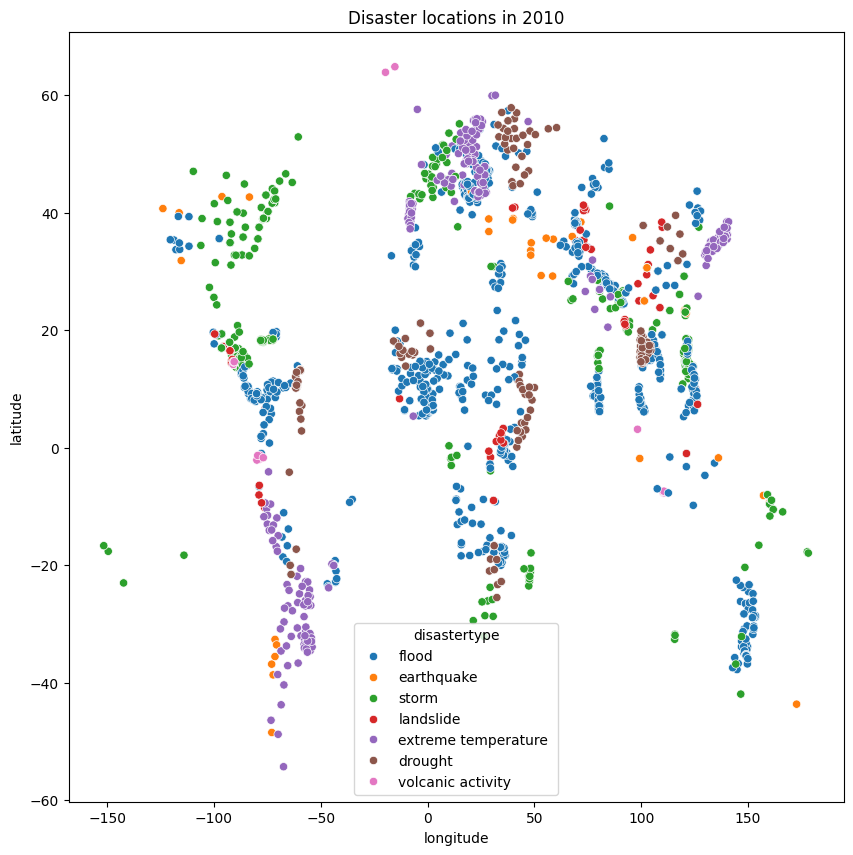

In [12]:
plot_disaster_locations(df_disasterlocations_filtered,2010)

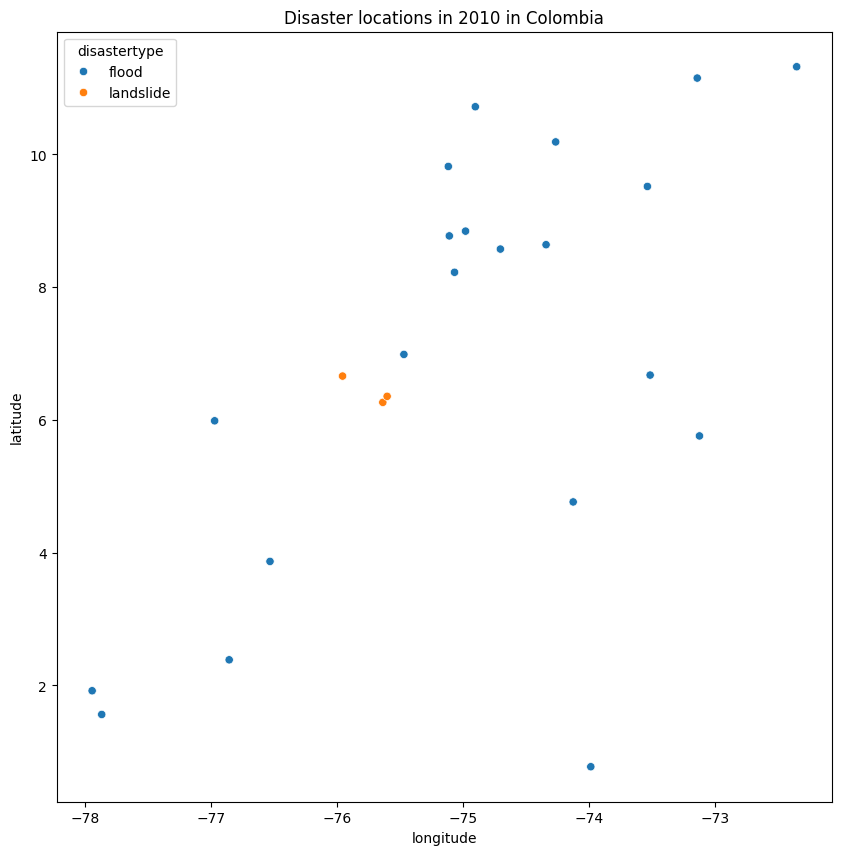

In [15]:
plot_disaster_locations_by_country(df_disasterlocations_filtered, 2010, 'Colombia')

In [40]:
df_disasterlocations_filtered

country  year    geolocation disastertype   latitude  longitude
0       Albania  2009    Ana E Malit        flood  42.020948  19.418317
1       Albania  2009         Bushat        flood  41.959294  19.514309
2        Angola  2001         Onjiva        flood -17.093484  15.665758
3        Angola  2009          Evale        flood -16.531533  15.773987
4        Angola  2009           Mupa        flood -16.200065  15.844189
...         ...   ...            ...          ...        ...        ...
39948  Dominica  2015  Saint Patrick        storm  15.282063 -61.291589
39949  Dominica  2015   Saint Andrew        storm  15.541065 -61.350601
39950  Dominica  2015   Saint George        storm  15.308003 -61.343527
39951  Dominica  2015    Saint David        storm  15.413059 -61.282094
39952  Dominica  2015     Saint Paul        storm  15.367511 -61.364736

[39953 rows x 6 columns]

In [73]:
df_weather = pd.read_csv('../datasets/global_temperatures_by_city.csv')

In [43]:
df_weather.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [50]:
df_weather[df_weather['Country'] == 'Colombia']['City'].unique()

array(['Cucuta', 'Maicao', 'Tunja', 'Sogamoso', 'Valledupar',
       'Villavicencio', 'Giron', 'Bucaramanga', 'Floridablanca',
       'Barrancabermeja', 'Malambo', 'Soledad', 'Santa Marta',
       'Barranquilla', 'Neiva', 'Soacha', 'Bogota', 'Ibague', 'Girardot',
       'Magangue', 'Monteria', 'Sincelejo', 'Bello', 'Pereira',
       'Envigado', 'Itagui', 'Manizales', 'Medellin', 'Dos Quebradas',
       'Cartagena', 'Buga', 'Cali', 'Tulua', 'Armenia', 'Cartago',
       'Palmira', 'Florencia', 'Buenaventura', 'Pasto'], dtype=object)

In [47]:
import unidecode

# Function to remove accents

def remove_accents(word):
    return unidecode.unidecode(word)

remove_accents('Medellín')

'Medellin'

In [74]:
# Apply unidecode to the city column

df_weather['City'] = df_weather['City'].apply(remove_accents)

In [75]:
df_weather['Country'] = df_weather['Country'].apply(remove_accents)

In [76]:
df_weather_filtered = df_weather[['dt', 'AverageTemperature', 'City', 'Country', 'Latitude', 'Longitude']]

In [60]:
# dt as index

df_weather_filtered.index = pd.to_datetime(df_weather_filtered['dt'])
df_weather_filtered = df_weather_filtered.drop('dt', axis=1)

In [65]:
df_weather_filtered.isnull().sum()

AverageTemperature    259
City                    0
Country                 0
Latitude                0
Longitude               0
dtype: int64

In [77]:
# delete null

df_weather_filtered = df_weather_filtered.dropna()

In [84]:
df_weather_filtered.dt

0          1831-01-01
1          1852-05-01
2          1931-02-01
3          1825-06-01
4          1836-07-01
              ...    
8599207    2003-06-01
8599208    1981-08-01
8599209    1930-04-01
8599210    1855-05-01
8599211    1977-04-01
Name: dt, Length: 8235082, dtype: object

In [80]:
# Separate the year and month

df_weather_filtered['year'] = df_weather_filtered.dt.year
df_weather_filtered['month'] = df_weather_filtered.dt.month

AttributeError: 'Series' object has no attribute 'year'

In [68]:
# Function to convert the coordinates
def convert_coordinate(value):
    if 'N' in value or 'E' in value:
        return float(value[:-1])
    elif 'S' in value or 'W' in value:
        return -float(value[:-1])
    return float(value)

In [70]:
# apply the function to the latitude and longitude columns

df_weather_filtered['Latitude'] = df_weather_filtered['Latitude'].apply(convert_coordinate)
df_weather_filtered['Longitude'] = df_weather_filtered['Longitude'].apply(convert_coordinate)

In [71]:
# sort city by index 

df_weather_filtered = df_weather_filtered[df_weather_filtered['City'] == 'Medellin'].sort_index()

df_weather_filtered

AverageTemperature      City   Country  Latitude  Longitude
dt                                                                     
1824-01-01              18.959  Medellin  Colombia      5.63     -75.87
1824-02-01              18.625  Medellin  Colombia      5.63     -75.87
1824-03-01              19.081  Medellin  Colombia      5.63     -75.87
1824-04-01              18.897  Medellin  Colombia      5.63     -75.87
1824-05-01              18.801  Medellin  Colombia      5.63     -75.87
...                        ...       ...       ...       ...        ...
2013-04-01              20.155  Medellin  Colombia      5.63     -75.87
2013-05-01              19.644  Medellin  Colombia      5.63     -75.87
2013-06-01              20.360  Medellin  Colombia      5.63     -75.87
2013-07-01              20.507  Medellin  Colombia      5.63     -75.87
2013-08-01              20.087  Medellin  Colombia      5.63     -75.87

[2018 rows x 5 columns]

In [72]:
df_weather_filtered.to_json(orient='records')

'[{"AverageTemperature":18.959,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":18.625,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":19.081,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":18.897,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":18.801,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":19.868,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":18.863,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":18.317,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":17.323,"City":"Medellin","Country":"Colombia","Latitude":5.63,"Longitude":-75.87},{"AverageTemperature":18.428,"City":"Medellin","Country":"Colo

In [ ]:
# Function with all filters

def filter_disasters(df, country, year, disaster_type, geolocation):
    # Check if the country, year, disaster type and geolocation are not None
    if country is not None:
        df = df[df['country'] == country]
    if year is not None:
        df = df[df['year'] == year]
    if disaster_type is not None:
        df = df[df['disastertype'] == disaster_type]
    if geolocation is not None:
        df = df[df['geolocation'] == geolocation]
    return df

# Using kwargs to pass the filters

def filter_disasters_kwargs(df, **kwargs):
    # Check if the country, year, disaster type and geolocation are not None
    for key, value in kwargs.items():
        if value is not None:
            df = df[df[key] == value]
    return df